# Project 4: Regression Analysis and Define Your Own Task!

## Group Members
- Shaira Alam

- Vani Agrawal 

- Dhakshina Ilango

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import issparse

# Question 1

## Dataset 1

In [2]:
# Read the CSV file into a DataFrame
diamonds_data = pd.read_csv("diamonds_ece219.csv").dropna(subset=['price'])
diamonds_data_numbers = diamonds_data.select_dtypes(include=['number'])
diamonds_data_objects = diamonds_data.select_dtypes(include=['object'])

# Display the first few rows of the DataFrame to verify data is loaded correctly
print(diamonds_data.head())

   Unnamed: 0 color clarity  carat        cut   symmetry     polish  \
0           0     E    VVS2   0.09  Excellent  Very Good  Very Good   
1           1     E    VVS2   0.09  Very Good  Very Good  Very Good   
2           2     E    VVS2   0.09  Excellent  Very Good  Very Good   
3           3     E    VVS2   0.09  Excellent  Very Good  Very Good   
4           4     E    VVS2   0.09  Very Good  Very Good  Excellent   

   depth_percent  table_percent  length  width  depth girdle_min girdle_max  \
0           62.7           59.0    2.85   2.87   1.79          M          M   
1           61.9           59.0    2.84   2.89   1.78        STK        STK   
2           61.1           59.0    2.88   2.90   1.77         TN          M   
3           62.0           59.0    2.86   2.88   1.78          M        STK   
4           64.9           58.5    2.79   2.83   1.82        STK        STK   

   price  
0    200  
1    200  
2    200  
3    200  
4    200  


## 1.1
### Plot a heatmap of the Pearson correlation matrix of the dataset columns. 

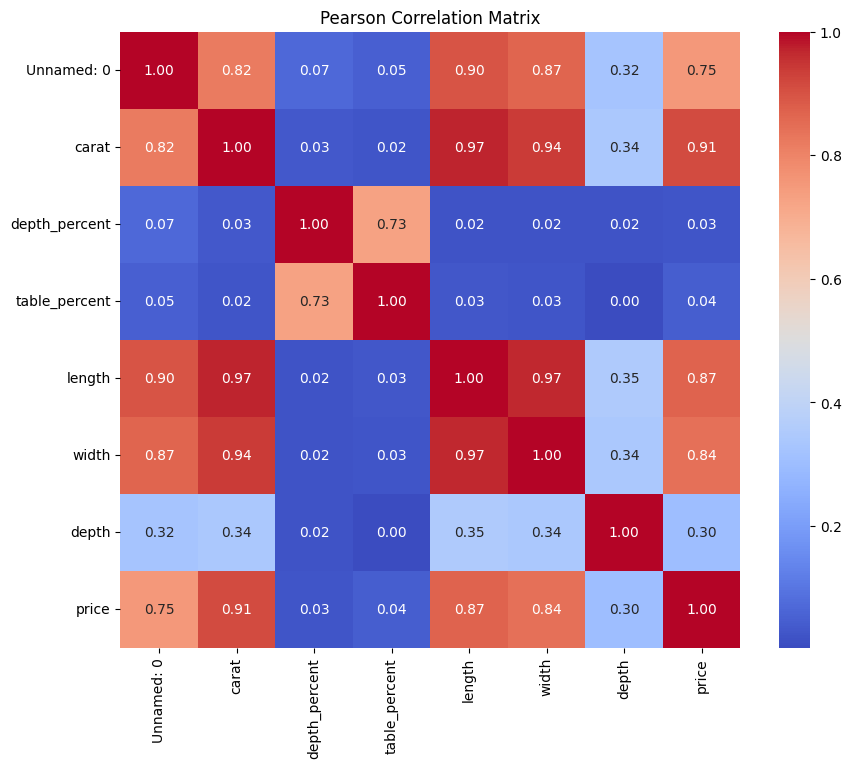

In [3]:
# Calculate the Pearson correlation matrix
corr_matrix = diamonds_data_numbers.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()


### Report which features have the highest absolute correlation with the target variable. 

In [4]:
# Find features with highest absolute correlation with the target variable
target_corr = corr_matrix['price'].abs().sort_values(ascending=False)
highest_corr_features = target_corr[1:]  # Excluding the target variable itself

print("Features with highest absolute correlation with the target variable (price):\n", highest_corr_features)

Features with highest absolute correlation with the target variable (price):
 carat            0.913479
length           0.869521
width            0.841887
Unnamed: 0       0.753482
depth            0.299696
table_percent    0.042453
depth_percent    0.025469
Name: price, dtype: float64


### In the context of either dataset, describe what the correlation patterns suggest.

1. Strong Positive Correlation:

Features such as carat, length, width, and Unnamed: 0 have a strong positive correlations with the target variable (price). Specifically, carat has the highest correlation coefficient (0.913479), indicating that as the carat weight of a diamond increases, its price tends to increase significantly. This relationship is similar with length and width as well. "Unnamed: 0" also shows a relatively strong positive correlation.

2. Weak Positive Correlation:

Features like depth exhibit weaker positive correlations with the target variable. Although these correlations are positive, they are lower than those of carat, length, and width. This suggests that these features may have an influence on the price, but their impact is not as significant as the features that have a strong correlation.

3. Weak Correlation:

Features such as depth_percent and table_percent show very weak positive correlations with the target variable. The correlation coefficient is close to zero, which means that it has a non-impactful linear relationship between these features and the price. These features may not have much impact on the price of a diamond.

## 1.2

### Plot the histogram of numerical features.

<Figure size 1200x1000 with 0 Axes>

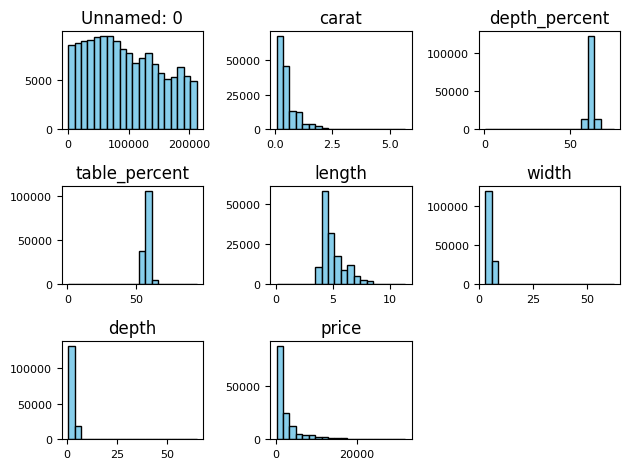

Skewness of numerical features:
Unnamed: 0        0.263138
carat             2.331773
depth_percent   -13.559608
table_percent   -11.046563
length            1.283604
width             4.115348
depth            27.493299
price             3.071737
dtype: float64


In [5]:
# Plot histograms of numerical features
plt.figure(figsize=(12, 10))
diamonds_data_numbers.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout()
plt.show()

# Check skewness of numerical features
skewness = diamonds_data_numbers.skew()
print("Skewness of numerical features:")
print(skewness)

# Handle high skewness using preprocessing techniques (e.g., log transformation)
skewed_features = skewness[abs(skewness) > 1].index
for feature in skewed_features:
    diamonds_data_numbers[feature] = np.log1p(diamonds_data_numbers[feature])

### What preprocessing can be done if the distribution of a feature has high skewness?

1. Log Transformation: 

Logarithmic transformation is usually effective for reducing right skewness (positive skewness). It compresses large values and stretches small values, making the distribution more symmetric. This transformation is especially useful when dealing with features such as depth that exhibit high positive skewness.

2. Square Root Transformation: 

Square root transformation is another effective method for reducing right skewness in feature distributions. It's similar to the logarithmic transformation but milder in its effect. This transformation is suitable for features with high positive skewness, such as carat, width, and price, where a less aggressive transformation is desired compared to the logarithmic transformation.

3. Inverse Transformation: 

Applying an inverse transformation, such as taking the reciprocal or the inverse square root, can help reduce left skewness in the distribution. This transformation stretches large values and compresses small values, making the distribution more symmetric. It can be useful for features like depth_percent and table_percent, which exhibit high negative skewness.

4. Square Transformation:

Similar to the inverse transformation, the square transformation can also help reduce left skewness by stretching small values and compressing large values. Similar to the square root transformation, this transformation is less aggressive than the inverse transformation and may be more suitable for features with moderate negative skewness.

## 1.3

### Construct and inspect the box plot of categorical features vs target variable.

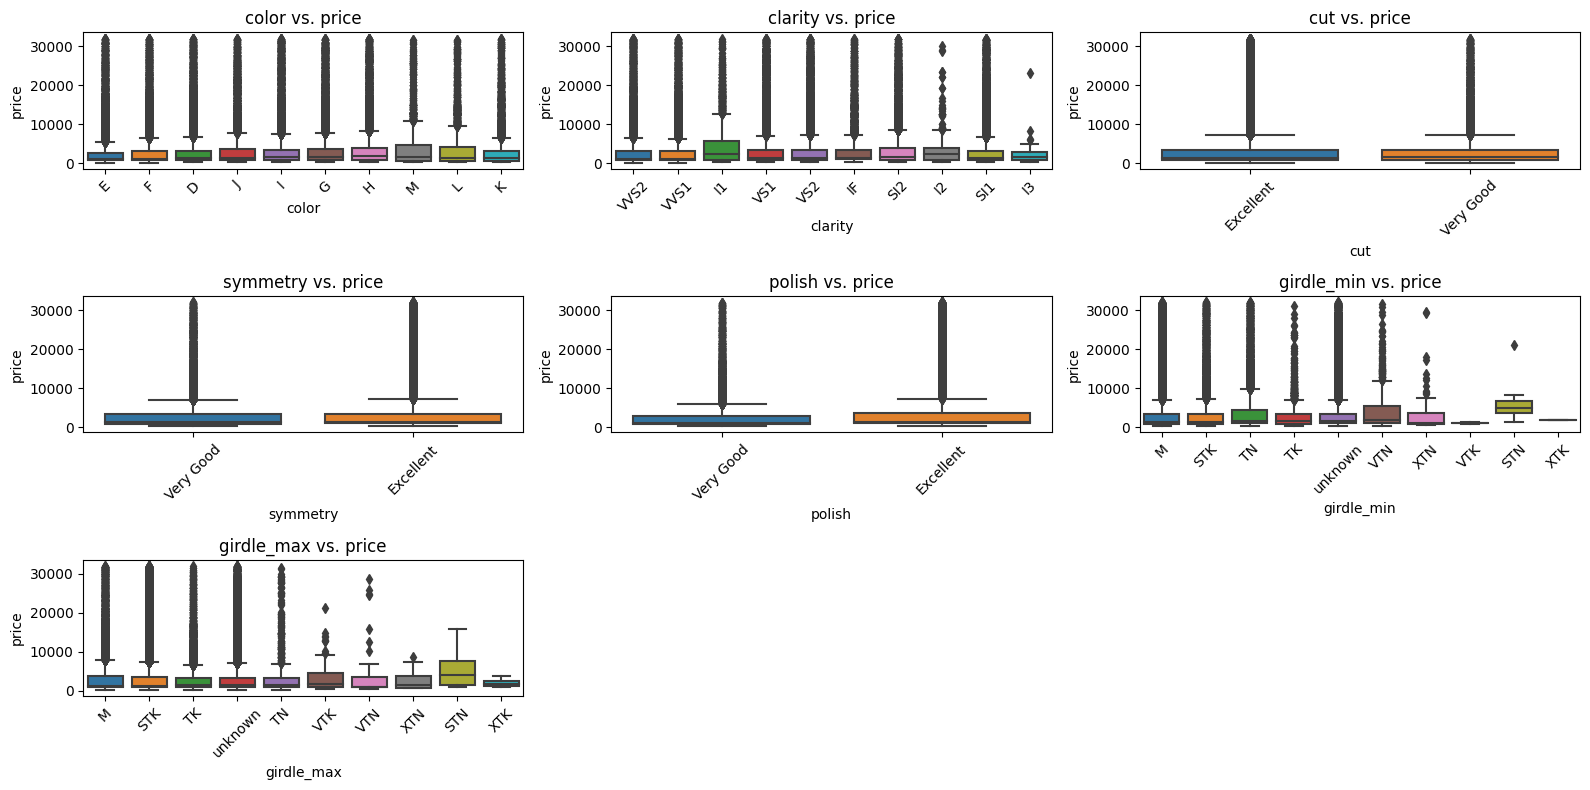

In [6]:
# Visualize box plots of categorical features vs. target variable (price)
num_plots = len(diamonds_data_objects.columns)
num_rows = (num_plots - 1) // 3 + 1  # Calculate the number of rows needed for subplots
plt.figure(figsize=(16, 8))
for i, col in enumerate(diamonds_data_objects.columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=col, y='price', data=diamonds_data)
    plt.title(f'{col} vs. price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### What do you find?

1. Color 

Color were relatively same distribution except for "M" 

2. Clarity

There were some variations, especially regarding I2 and I3 

3. Cut 

Both had similar distribution.

4. Symmetry

Distribution was relatively the same with regard to price. 

5. Polish

Similar to Cut and Symmetry, they were relatively similarly distributed, however, having an "Excellent" polish did have a slightly wider range in the higher price range. 

6. girdle_min

The disbtribution was the same except for XTN, VTK, STN, and XTK. 

6. girdle_max 

The distribution was similar except for VTK, VTN, XTN, STN, XTK. 

## 1.4
For the Diamonds dataset, plot the counts by color, cut and clarity.

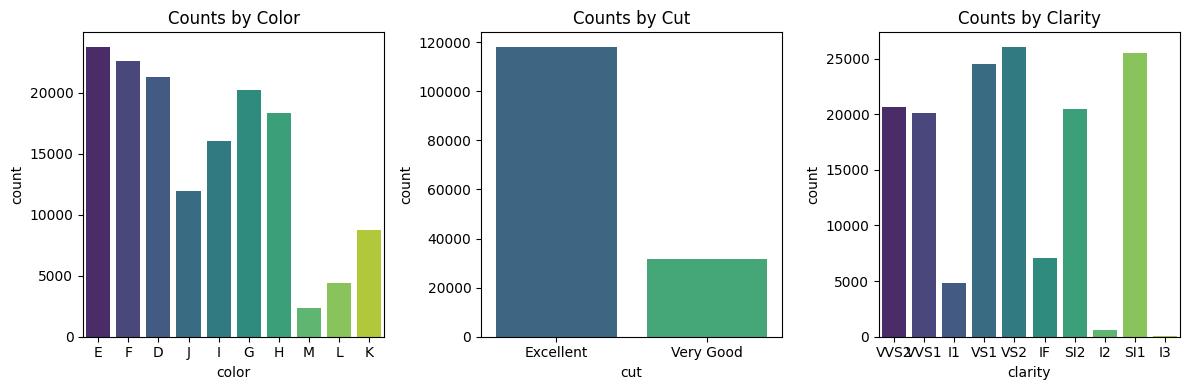

In [7]:
# Plot counts by color
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='color', data=diamonds_data, palette='viridis')
plt.title('Counts by Color')

# Plot counts by cut
plt.subplot(1, 3, 2)
sns.countplot(x='cut', data=diamonds_data, palette='viridis')
plt.title('Counts by Cut')

# Plot counts by clarity
plt.subplot(1, 3, 3)
sns.countplot(x='clarity', data=diamonds_data, palette='viridis')
plt.title('Counts by Clarity')

plt.tight_layout()
plt.show()

# Question 2

## 2.1
Standardize feature columns and prepare them for training.

In [8]:
# # Separate features (X) and target variable (y)
# from sklearn.impute import SimpleImputer

# X = diamonds_data.drop(columns=['price']).dropna()  # Features (all columns except 'price')
# y = diamonds_data['price']  # Target variable

# # Define numerical and categorical features
# numeric_features = X.select_dtypes(include=['number']).columns
# categorical_features = X.select_dtypes(include=['object']).columns

# # Define preprocessing pipeline
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values in numerical features
#     ('scaler', StandardScaler())  # Scale numerical features
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical features
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])
 
# # Prepare data for training (split into train and test sets)
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit and transform the preprocessor on the training data 
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

# # Convert sparse matrices to dense arrays if necessary
# if issparse(X_train):
#     X_train = X_train.toarray()

# if issparse(X_test):
#     X_test = X_test.toarray()

# # Drop rows with missing values in Y_train
# Y_train = Y_train.dropna().reset_index(drop=True)
# missing_indices = Y_train[Y_train.isnull()].index
# X_train_preprocessed = np.delete(X_train, missing_indices, axis=0)
# X_train = X_train_preprocessed

        Unnamed: 0 color clarity  carat        cut   symmetry     polish  \
0                0     E    VVS2   0.09  Excellent  Very Good  Very Good   
1                1     E    VVS2   0.09  Very Good  Very Good  Very Good   
2                2     E    VVS2   0.09  Excellent  Very Good  Very Good   
3                3     E    VVS2   0.09  Excellent  Very Good  Very Good   
4                4     E    VVS2   0.09  Very Good  Very Good  Excellent   
...            ...   ...     ...    ...        ...        ...        ...   
149866      212615     G     VS1   2.01  Excellent  Excellent  Excellent   
149867      212616     F     VS2   1.90  Excellent  Excellent  Excellent   
149868      212617     I    VVS1   2.45  Excellent  Excellent  Excellent   
149869      212619     J    VVS2   2.50  Excellent  Excellent  Excellent   
149870      212620     D    VVS1   1.50  Excellent  Excellent  Excellent   

        depth_percent  table_percent  length  width  depth girdle_min  \
0             

In [76]:
print("Printing X")
X = diamonds_data.drop(columns=['price']).dropna()  # Features (all columns except 'price')
print(X.head())

print("Printing y")
y = diamonds_data['price'].dropna()  # Target variable
print(y.head())

numerical_features = X.select_dtypes(include=['number']).columns.values
categorical_features = X.select_dtypes(include=['object']).columns.values

print(numerical_features)
print(categorical_features)

Printing X
   Unnamed: 0 color clarity  carat        cut   symmetry     polish  \
0           0     E    VVS2   0.09  Excellent  Very Good  Very Good   
1           1     E    VVS2   0.09  Very Good  Very Good  Very Good   
2           2     E    VVS2   0.09  Excellent  Very Good  Very Good   
3           3     E    VVS2   0.09  Excellent  Very Good  Very Good   
4           4     E    VVS2   0.09  Very Good  Very Good  Excellent   

   depth_percent  table_percent  length  width  depth girdle_min girdle_max  
0           62.7           59.0    2.85   2.87   1.79          M          M  
1           61.9           59.0    2.84   2.89   1.78        STK        STK  
2           61.1           59.0    2.88   2.90   1.77         TN          M  
3           62.0           59.0    2.86   2.88   1.78          M        STK  
4           64.9           58.5    2.79   2.83   1.82        STK        STK  
Printing y
0    200
1    200
2    200
3    200
4    200
Name: price, dtype: int64
['Unnamed: 0

In [ ]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ],
#     remainder='passthrough'
# )

In [77]:
# One-hot encode categorical features
categorical_encoded = pd.get_dummies(X[categorical_features], drop_first=True).astype(int)

# Concatenate numerical and one-hot encoded categorical features
X_encoded = pd.concat([X[numerical_features], categorical_encoded], axis=1)

print(X_encoded)

        Unnamed: 0  carat  depth_percent  table_percent  length  width  depth  \
0                0   0.09           62.7           59.0    2.85   2.87   1.79   
1                1   0.09           61.9           59.0    2.84   2.89   1.78   
2                2   0.09           61.1           59.0    2.88   2.90   1.77   
3                3   0.09           62.0           59.0    2.86   2.88   1.78   
4                4   0.09           64.9           58.5    2.79   2.83   1.82   
...            ...    ...            ...            ...     ...    ...    ...   
149866      212615   2.01           63.0           59.0    7.98   8.03   5.05   
149867      212616   1.90           62.7           57.0    7.82   7.87   4.92   
149868      212617   2.45           61.2           60.0    8.58   8.65   5.28   
149869      212619   2.50           59.1           62.0    8.80   8.85   5.22   
149870      212620   1.50           62.9           56.0    7.25   7.30   4.58   

        color_E  color_F  c

In [78]:
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression, f_regression
X_scaled = preprocessing.scale(X_encoded[numerical_features])
X_preprocessed = pd.concat([pd.DataFrame(X_scaled, columns=numerical_features), categorical_encoded], axis=1)
print(X_preprocessed)

        Unnamed: 0     carat  depth_percent  table_percent    length  \
0        -1.602442 -1.157106       0.215866       0.345119 -2.146391   
1        -1.602425 -1.157106       0.014689       0.345119 -2.156289   
2        -1.602408 -1.157106      -0.186488       0.345119 -2.116697   
3        -1.602391 -1.157106       0.039836       0.345119 -2.136493   
4        -1.602374 -1.157106       0.769101       0.218693 -2.205778   
...            ...       ...            ...            ...       ...   
149866    1.996218  3.631605       0.291307       0.345119  2.931233   
149867    1.996235  3.357252       0.215866      -0.160588  2.772867   
149868    1.996252  4.729018      -0.161341       0.597973  3.525108   
149869    1.996286  4.853724      -0.689429       1.103680  3.742861   
149870    1.996303  2.359604       0.266160      -0.413441  2.208686   

           width     depth  color_E  color_F  color_G  ...  \
0      -2.078247 -0.730430        1        0        0  ...   
1      -2.0

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Print shapes and sample data before preprocessing
print("Shapes and sample data before preprocessing:")
print("X_train shape:", X_train.shape)
print("X_train head:\n", X_train.head())
print("y_train shape:", Y_train.shape)
print("y_train head:\n", Y_train.head())
print("X_test shape:", X_test.shape)
print("X_test head:\n", X_test.head())
print("y_test shape:", Y_test.shape)
print("y_test head:\n", Y_test.head())

# # Apply transformations to training and testing data
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

# # Print shapes and sample data after preprocessing
# print("\nShapes and sample data after preprocessing:")
# print("X_train_transformed shape:", X_train_transformed.shape)
# print("X_train_transformed sample:\n", X_train_transformed[:5])
# print("X_test_transformed shape:", X_test_transformed.shape)
# print("X_test_transformed sample:\n", X_test_transformed[:5])


Shapes and sample data before preprocessing:
X_train shape: (119896, 46)
X_train head:
        Unnamed: 0     carat  depth_percent  table_percent    length     width  \
80033   -0.004553 -0.009811       0.190719       0.345119  0.169718  0.158772   
82831    0.061423 -0.134517      -0.060752       1.103680  0.041046  0.044541   
31549   -0.959298 -0.608400      -0.312223       0.092266 -0.651808 -0.640843   
94480    0.350785  0.114895       0.215866      -0.666295  0.377574  0.358676   
78520   -0.039572 -0.458753      -0.010458       0.345119 -0.424156 -0.421901   

          depth  color_E  color_F  color_G  ...  girdle_min_unknown  \
80033  0.041502        0        0        0  ...                   0   
82831 -0.026764        0        1        0  ...                   1   
31549 -0.278824        0        0        1  ...                   1   
94480  0.099265        0        0        0  ...                   0   
78520 -0.179050        0        0        0  ...                   0   

## 2.2

### Describe how this step qualitatively affects the performance of your models in terms of test RMSE. 

We first standardize the numerical features using StandardScaler. This preprocessing transforms the numerical features so that they have a mean of 0 and a standard deviation of 1. It helps to bring all features to a similar scale and prevents features with larger magnitudes from having significantly larger impact on the training than other features.

The benefits are as follows:

1. Model Convergence: 

Standardizing helps algorithms converge faster during training. Algorithms such as gradient descent-based methods often converge more quickly when features are on a similar scale, leading to potentially faster training times and more stable optimization.

2. Improved Interpretability: 

Standardization allows for the relationships between features to be understood -- and allows the importance of the values to be on the same scale. 

3. Reduced Sensitivity to Outliers: 

Standardizing allows for the presesnce of outliers to have less of an impact. By centering around the mean and scaling by the standard deviation, outliers cannot heavily impact the model's performance. 

### Is it true for all model types? 

1. Linear Models (i.e. Linear Regression, Logistic Regression):

Standardization is important for linear models because these models assume that the input features have a linear relationship with the target variable. Standardizing features ensures that the coefficients obtained during training are directly comparable, leading to more stable models.

2. Tree-Based Models (i.e. Decision Trees, Random Forests):

Tree-based models are generally not sensitive to the scale of features because they make decisions based on feature thresholds rather than the absolute values of features. Therefore, standardization may not be as significant on the performance of tree-based models compared to linear models. However, standardization can still help in scenarios where there are interactions between features or when using algorithms that incorporate feature importance measures.

3. Distance-Based Models (i.e. K-Nearest Neighbors):

Distance-based models calculate distances between data points, making them sensitive to the scale of features. Standardizing features ensures that they equally contribute to the distance calculations.

4. Neural Networks:

Standardizing features helps ensure that optimization is efficient and that the gradients are well-scaled, leading to faster convergence and better performance.

4. Support Vector Machines (SVMs):

SVMs are sensitive to the scale of features because they rely on the distance between data points to define decision boundaries. Standardizing features helps SVMs perform better by making sure that features contribute equally to the decision-making process and preventing bias towards features with larger scales.

### Also list two features for either dataset that has the lowest MI w.r.t to the target.

In [80]:
print("X_train_transformed shape:", X_train.shape)
print("X_train_transformed samples:\n", X_train[:5])
print("Y_train shape:", Y_train.shape)
print("Y_train samples:\n", Y_train[:5])

X_train_transformed shape: (119896, 46)
X_train_transformed samples:
        Unnamed: 0     carat  depth_percent  table_percent    length     width  \
80033   -0.004553 -0.009811       0.190719       0.345119  0.169718  0.158772   
82831    0.061423 -0.134517      -0.060752       1.103680  0.041046  0.044541   
31549   -0.959298 -0.608400      -0.312223       0.092266 -0.651808 -0.640843   
94480    0.350785  0.114895       0.215866      -0.666295  0.377574  0.358676   
78520   -0.039572 -0.458753      -0.010458       0.345119 -0.424156 -0.421901   

          depth  color_E  color_F  color_G  ...  girdle_min_unknown  \
80033  0.041502        0        0        0  ...                   0   
82831 -0.026764        0        1        0  ...                   1   
31549 -0.278824        0        0        1  ...                   1   
94480  0.099265        0        0        0  ...                   0   
78520 -0.179050        0        0        0  ...                   0   

       girdle_ma

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_train, Y_train)

In [82]:
mi_df = pd.DataFrame({"Feature": X_train.columns, "MI Score": mi_scores})

# Sort the DataFrame by MI scores in descending order
mi_df_sorted = mi_df.sort_values(by='MI Score', ascending=False)

# Display the features with the lowest MI scores
lowest_mi_features = mi_df_sorted.head(2)
print("Features with the lowest Mutual Information scores:")
print(lowest_mi_features)


Features with the lowest Mutual Information scores:
      Feature  MI Score
0  Unnamed: 0  7.601719
1       carat  1.356974


# Question 3

## 3.1 
Training: train multiple algorithms and compare their performance using average RMSE from 10-fold cross-validation

In [84]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Perform 10-fold cross-validation and calculate average RMSE for training for each algorithm
num_folds = 10
results_training = {}

for model_name, model in models.items():
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X_train, Y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        Y_train_fold, Y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]

        # Fit the model on training data
        model.fit(X_train_fold, Y_train_fold)

        # Predict on validation data
        Y_pred_fold = model.predict(X_test_fold)

        # Calculate RMSE for validation set
        rmse = np.sqrt(mean_squared_error(Y_test_fold, Y_pred_fold))
        rmse_scores.append(rmse)

    # Calculate average RMSE across all folds
    avg_rmse = np.mean(rmse_scores)
    results_training[model_name] = avg_rmse

# Print average RMSE for each algorithm
for model_name, avg_rmse in results_training.items():
    print(f'{model_name}: Average RMSE (Training) = {avg_rmse:.2f}')

Linear Regression: Average RMSE (Training) = 1475.46
Decision Tree: Average RMSE (Training) = 17.00
Random Forest: Average RMSE (Training) = 20.18


## 3.2 
Evaluation: Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets. For random forest model, measure “Out-of-Bag Error” (OOB) as well.

In [90]:
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

# Dictionary to store results
results = {}

# Loop through models
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = -cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
    
    # Calculate RMSE for training set
    rmse_train_scores = np.sqrt(cv_scores)
    avg_rmse_train = np.mean(rmse_train_scores)

    # Store training set scores
    results[model_name] = {'Training RMSE': rmse_train_scores}
    
    # Perform cross-validation for validation set
    rmse_val_scores = np.sqrt(cv_scores)
    avg_rmse_val = np.mean(rmse_val_scores)

    # Store validation set scores
    results[model_name]['Validation RMSE'] = rmse_val_scores

    # If Random Forest, calculate OOB error
    # if model_name == 'Random Forest':
    #     oob_predictions = np.zeros(len(Y_train))
    #     oob_counts = np.zeros(len(Y_train))
    #     for tree, samples in zip(model.estimators_, model.estimators_samples_):
    #         oob_indices = np.delete(np.arange(len(Y_train)), samples)
    #         oob_predictions[oob_indices] += tree.predict(X_train.iloc[oob_indices])
    #         oob_counts[oob_indices] += 1

    #     oob_predictions /= np.maximum(1, oob_counts)
    #     oob_rmse = np.sqrt(mean_squared_error(Y_train, oob_predictions))
    

c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packag

In [94]:
model = models["Random Forest"]

oob_predictions = np.zeros(len(Y_train))
oob_counts = np.zeros(len(Y_train))
for tree, samples in zip(model.estimators_, model.estimators_samples_):
    oob_indices = np.delete(np.arange(len(Y_train)), samples)
    oob_predictions[oob_indices] += tree.predict(X_train.iloc[oob_indices])
    oob_counts[oob_indices] += 1

oob_predictions /= np.maximum(1, oob_counts)
oob_rmse = np.sqrt(mean_squared_error(Y_train, oob_predictions))

results["Random Forest"]['OOB RMSE'] = oob_rmse

c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Python310\lib\site-packag

In [97]:
# Print RMSE for training and validation sets

print(results.items())
for model_name, scores in results.items():
    print(f'{model_name}:')
    print(f'   Average RMSE (Training): {np.mean(scores["Training RMSE"]):.2f}')
    print(f'   Average RMSE (Validation): {np.mean(scores["Validation RMSE"]):.2f}')
    # If Random Forest, calculate OOB error
    if model_name == 'Random Forest':
        print(f'   Average RMSE (OOB): {np.mean(scores["OOB RMSE"]):.2f}')

dict_items([('Linear Regression', {'Training RMSE': array([1432.24950485, 1468.83419038, 1484.47810014, 1498.23246743,
       1544.81214529, 1436.0743509 , 1492.18666083, 1442.1216482 ,
       1480.92658636, 1478.62227049]), 'Validation RMSE': array([1432.24950485, 1468.83419038, 1484.47810014, 1498.23246743,
       1544.81214529, 1436.0743509 , 1492.18666083, 1442.1216482 ,
       1480.92658636, 1478.62227049])}), ('Decision Tree', {'Training RMSE': array([ 5.23921506, 19.17659471,  6.09623272, 26.70799845,  8.30842092,
        6.20204707, 35.44167302,  6.69961898,  7.7982206 , 63.69555607]), 'Validation RMSE': array([ 5.23921506, 19.17659471,  6.09623272, 26.70799845,  8.30842092,
        6.20204707, 35.44167302,  6.69961898,  7.7982206 , 63.69555607])}), ('Random Forest', {'Training RMSE': array([13.69339429, 23.08419121, 13.89899436, 18.81878436,  8.63816871,
       16.14268803, 36.72431866, 14.17066306,  7.54674178, 60.24130925]), 'Validation RMSE': array([13.69339429, 23.08419121

# Question 4

## 4.0 Train Models

Ordinary least squares (linear regression without regularization)

In [49]:
from sklearn.linear_model import LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_train, Y_train) # Remove this line of code

LinearRegression()

Lasso

In [50]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0) # need to tune
lasso_model.fit(X_train, Y_train) # Remove this line of code

Lasso()

Ridge regression

In [51]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0) # need to tune
ridge_model.fit(X_train, Y_train) # Remove this line of code

Ridge()

## What is the objective function? 

The objective function is the function that an ML model aims to maximize/minimize during training and therefore find the corresponding parameter set in the process. 

## 4.1 Explain how each regularization scheme affects the learned parameter set.

Regularization schemes such as Lasso and Ridge Regression add penalty terms to prevent the model from overfitting to the data and improve generalization on unseen data. <br>

- OLS(Ordinary Least Squares): OLS does not include any regularization term. It aims to minimize the sum of squared difference between the predicted and actual target value. As a result it might result in overfitting of train data. 

- Lasso Regression: The penalty term is equal to the absolute value of the coefficients multiplied by alpha(regularization parameter). This shrinks some coefficients to zero, effectively performing feature selection by eleminating less important features of the model. 

- Ridge Regression: The penalty term is equal to the squared value of the coefficients multiplied by alpha (regularization parameter). It penalizes large coefficients and thus some coefficients tend to zero.

## 4.2 Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.

The best regularization scheme is the Ridge Regression with (alpha = 1) since the MSE of Ridge Regression is lesser than that of Lasso Regression. 

Parameter grids are used for both Lasso and Ridge regression, specifying a range of alpha values to search for the optimal penalty parameter.
GridSearchCV is used to perform grid search with cross-validation (cv=5 indicates 5-fold cross-validation) to evaluate the models' performance using negative mean squared error as the scoring metric. After fitting the models, we extract the best parameters and best scores for both Lasso and Ridge.<br><br>
Finally, the regularization scheme with the optimal alpha values along with their MSE values are reported.






In [ ]:
# Parameter Grid for Lasso and Ridge Regression 
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=10, scoring='neg_mean_squared_error')
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=10, scoring='neg_mean_squared_error')

grid_search_lasso.fit(X_train_preprocessed, Y_train)
grid_search_ridge.fit(X_train_preprocessed, Y_train)

In [ ]:
# Print best parameters and scores
print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best MSE for Lasso:", -grid_search_lasso.best_score_)

print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best MSE for Ridge:", -grid_search_ridge.best_score_)

## 4.3 Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.

The ridge regularization is sensitive to the scale of the features. Scaling the features ensures that all features contribute uniformly to the regularization process. Ridge regularization is also often optimized using gradient descent which allows for smoother progress towards the optimal solution. 

## 4.4 Some linear regression packages return p-values for different features. What is the meaning of these p-values and how can you infer the most significant features? A qualitative reasoning is sufficient.

p-values represent the probability that there is no relationship between the target and dependent variables. Features with lower p-values are considered statistically significant and more likely to contribute to the prediction of target variable. 

# Question 5

Perform polynomial regression by crafting products of features you selected in part 3.1.4 up to a certain degree (max degree 6) and applying ridge regression on the compound features. You can use scikit-learn library to build such features. Avoid overfitting by proper regularization. Answer the following:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
X = X.drop(columns=['Unnamed: 0'])

In [ ]:
# Feature selection using mutual information
mi_selector = SelectKBest(mutual_info_regression, k=5)
X_train_mi = mi_selector.fit_transform(X_train, Y_train)
selected_features_mi_indices = mi_selector.get_support(indices=True)
selected_features_mi = X.columns[selected_features_mi_indices]

print("Selected features using Mutual Information:", selected_features_mi)

In [ ]:
# Feature selection using F-scores
f_selector = SelectKBest(f_regression, k=5)
X_train_f = f_selector.fit_transform(X_train, Y_train)
selected_features_f_indices = f_selector.get_support(indices=True)
selected_features_f = X.columns[selected_features_f_indices]

print("Selected features using F-scores:", selected_features_f)

In [ ]:
selected_features_indices = list(set(selected_features_mi_indices) | set(selected_features_f_indices))

In [ ]:
degrees = np.arange(1,7)

In [ ]:
mean_test_scores = []
mean_train_scores = []

for degree in degrees:
  poly_transform = PolynomialFeatures(degree=degree)
  X_poly = poly_transform.fit_transform(X_train[:, selected_features_indices])

  # Standardization of features
  scaler = StandardScaler()
  X_poly_scaled = scaler.fit_transform(X_poly)

  # Ridge Regression
  r_model = Ridge(alpha=1, random_state=42)

  # 10 fold CV
  grid_search = GridSearchCV(r_model, param_grid={}, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
  
  grid_search.fit(X_poly_scaled, Y_train)

  mean_test_scores.append(grid_search.cv_results_['mean_test_score'])
  mean_train_scores.append(grid_search.cv_results_['mean_train_score'])

In [ ]:
mean_test_scores = np.array(mean_test_scores)
mean_train_scores = np.array(mean_train_scores)

In [ ]:
poly_result = pd.DataFrame({'mean_test_score': mean_test_scores.mean(axis=1),
                            'mean_train_score': mean_train_scores.mean(axis=1),
                            'param_poly_transform__degree': degrees})
print(poly_result)

In [ ]:
# Polynomial degree = 3
print(min(mean_test_scores))
print(min(mean_train_scores))

## 5.1 What are the most salient features? Why?

The most salient features are 'color', 'clarity', 'symmetry', 'polish' and 'depth_percent'. These features are determinant of the diamonds quallity and consequently their price. Color of the diamond affects its value. Clarity refers to internal flaws therefore higher the clarity the more valuable the diamond. Symmetry is an important aspect of the diamond's cit quality and diamonds with excellent symmetry are more desirable. Polish  refers to the smoothness of the diamond the more polished the diamond is the greater is the value. Depth Percentage is a measure of the depth of the diamond relative to its width. THis affects the value of the diamond as well. Therefore the most salient features are those with greatest absolute coefficients.

## 5.2 What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?

Polynomial degree of 3 is the best as it has lowest test error and the train error is relatively low as well. Therefore the model is able to learn and generalize well on test data. A high order polynomial overfits on the train data since its train error is significantly lower than the test error.

# Question 6

You will train a multi-layer perceptron (fully connected neural network). You can simply use the sklearn implementation:

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Define parameter grid
hidden_layers = [(50,), (100,), (50, 50), (100, 50)]
alphas = [0.0001, 0.001, 0.01, 0.1, 1]  # Regularization strength
best_mse = float('inf')
best_params = {}

In [ ]:
# Perform grid search with for loop
for layer in hidden_layers:
    for a in alphas:
        mlp = MLPRegressor(hidden_layer_sizes=layer,
                           alpha=a,
                           activation='relu',
                           solver='adam',
                           random_state=42)

        mlp.fit(X_train, Y_train)

        y_pred = mlp.predict(X_test)

        mse = mean_squared_error(Y_test, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_params = {
                'hidden_layer_sizes': layer,
                'alpha': a
            }


In [ ]:
print("Best MSE:", best_mse)
print("Best Parameters:", best_params)

## 6.1 Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total)

## 6.2 How does the performance generally compare with linear regression? Why?

## 6.3 What activation function did you use for the output and why? You may use none.

## 6.4 What is the risk of increasing the depth of the network too far?

# Question 7

We will train a random forest regression model on datasets, and answer the following:
- Random forests have the following hyper-parameters:
    - Maximum number of features;
    - Number of trees;
    - Depth of each tree;

In [33]:
from sklearn.ensemble import RandomForestRegressor

num_trees = 100
max_num_features = 'sqrt'
max_depth_tree = None

random_forest_model = RandomForestRegressor(
    n_estimators= num_trees,
    max_features= max_num_features,
    max_depth= max_depth_tree,
    random_state= 42
)

random_forest_model.fit(X_train, Y_train)

y_pred = random_forest_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 317.28956464917763


## 7.1
Explain how these hyper-parameters affect the overall performance. Describe if
and how each hyper-parameter results in a regularization effect during training.

How each hyperparameter affects the overall performance:
1. Maximum number of features
    - The maximum number of features is used to measure the number of features each tree is allowed to considered when making a split. A large number of features increases the model complexity, while a small number of features decreases the model complexity, which helps prevent overfitting and improves the generalization to new data.
2. Number of trees
    - Increasing the number of trees improves the performance, but only up to a certain point. A larger number of trees helps provide better generalization which reduces the risk of overfitting.
3. Depth of each tree
    - A deeper tree will capture more complex relationships in the training data, but has a high chance of overfitting to the training data if the depth of the tree is not controlled.

## 7.2
How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?

How each hyperparameter results in a regularization effect during training:
1. Maximum number of features
    - Reducing the maximum number of features results in a regularization effect during training. This is because this reduces the amount of information each tree can use for decision-making.
2. Number of trees
    - Multiple trees helps smooth out invidual tree biases and overall helps reduce overfitting to the training data.
3. Depth of each tree
    - Limiting the depth of each tree helps prevent the tree from growing too deep and overfitting to the noise in the training data. 

Random forests create a highly non-linear decision boundary by combining multiple decision trees, where each tree is trained on different parts of the data and features. Each tree is trained on a random portion of the initial training data by bootstrap sampling, which adds diversity to the trees and allows for various interpretations of the data. Furthermore, random feature selection at each node makes sure that every tree examines many facets of the data, avoiding the over-specialization of individual trees to certain features. Random Forests mimic extremely non-linear functions by combining estimates from various different trees, thereby capturing intricate links and interactions in the data. When compared to a single decision tree, this ensemble technique reduces the danger of overfitting while improving the robustness and generalization of the model.

## 7.3
Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure.

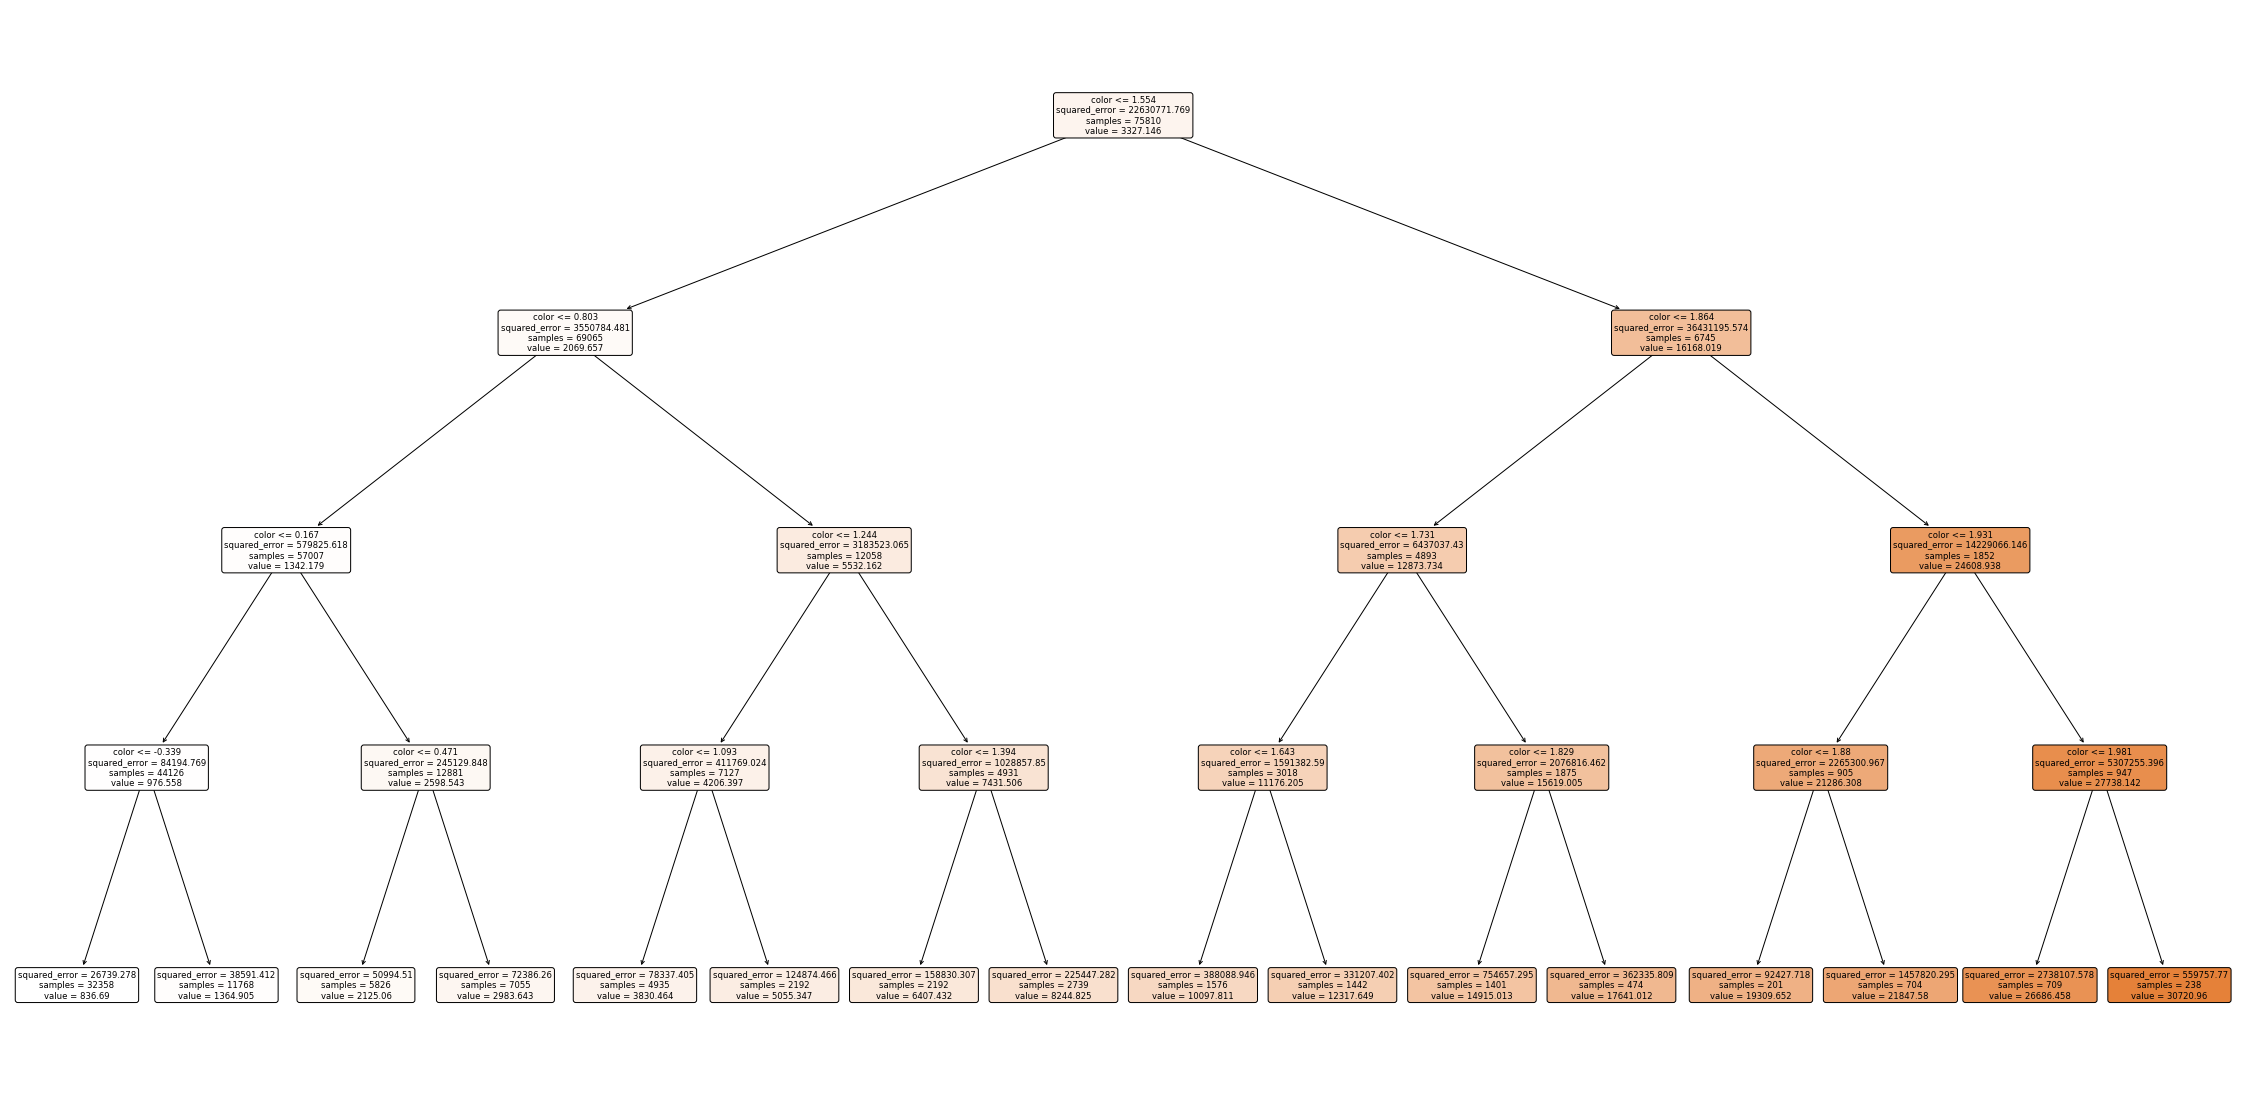

In [59]:
from sklearn.tree import plot_tree

random_forest_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=4,
    random_state=42
)

random_forest_model.fit(X_train, Y_train)

random_tree = random_forest_model.estimators_[np.random.randint(0, len(random_forest_model.estimators_))]

plt.figure(figsize=(40, 20))
plot_tree(random_tree, feature_names=list(X.columns[1:]), filled=True, rounded=True)
plt.show()

Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?

In [52]:
root_feature_index = random_tree.tree_.feature[0]

root_node_feature = X.columns[root_feature_index+1]

print("Feature selected for branching at root node: ", root_node_feature)

Feature selected for branching at root node:  color


## 7.4
Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.

In [ ]:
oob_error = 1 - random_forest_model.oob_prediction_
print(f'Out-of-Bag (OOB) Error: {oob_error}')

The OOB error is the error that provides an estimate of the model's performance on unseen data based on out of bag samples. Out of bag samples are data points that were not used in the training of the individual trees. A low OOB error indicates better model performance.
The R2 score is a metric that is used to evaluate the goodness of fit of a regression model. For the Random Forest Regressor, the R2 score measures the proportion of the variance in the target variable that is explained by the independent variables in the model. This measure how well the model fits the data.

# Question 8

## 8.1
Read the documentation of LightGBM OR CatBoost and determine the important hyperparameters along with a search space for the tuning of these parameters (keep the search space small).

## 8.2
Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Keep your search space small enough to finish running on a single Google Colab instance within 60 minutes. Report the best hyperparameter set found and the corresponding RMSE.

## 8.3
Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization (shrinks the generalization gap)? Which affects the fitting efficiency?

# Question 9

## 9.1
Report the following statistics for each hashtag, i.e. each file has:
- Average number of tweets per hour
- Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user's followers twice as well)
- Average number of retweets per tweet

In [12]:
import json
import os

def tweet_statistics(tweet_file):
    hours = []
    followers = []
    retweets = []
    total_tweets = 0

    data_path = './ECE219_tweet_data'

    tweet_path = os.path.join(data_path, f'{tweet_file}')

    with open(tweet_path, encoding='utf8') as file:
        for line in file:
            tweet = json.loads(line)
            total_tweets += 1
            hours.append(tweet['citation_date'])
            followers.append(tweet['author']['followers'])
            retweets.append(tweet['metrics']['citations']['total'])

    avg_tweets_per_hour = total_tweets / ((max(hours) - min(hours)) / 3600.0)
    avg_followers_per_tweet = sum(followers) / float(total_tweets)
    avg_retweets_per_tweet = sum(retweets) / float(total_tweets)

    return {
        'Average tweets per hour': avg_tweets_per_hour,
        'Average followers per tweet': avg_followers_per_tweet,
        'Average retweets per tweet': avg_retweets_per_tweet
    }


In [14]:
tweetfiles = ['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt']

for tweet in tweetfiles:
    stats = tweet_statistics(tweet)

    print("-"*20 + f" Statistics for: {tweet} " + "-"*20)
    print("Average number of tweets per hour: ", stats['Average tweets per hour'])
    print("Average number of followers of users posting the tweets per tweet: ", stats['Average followers per tweet'])
    print("Average number of retweets per tweet: ", stats['Average retweets per tweet'])


-------------------- Statistics for: tweets_#gohawks.txt --------------------
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
-------------------- Statistics for: tweets_#gopatriots.txt --------------------
Average number of tweets per hour:  40.95469800606194
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
-------------------- Statistics for: tweets_#nfl.txt --------------------
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
-------------------- Statistics for: tweets_#patriots.txt --------------------
Average number of tweets per hour:  750.89426460689
Average number of followers of users pos

## 9.2
Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet_[#hashtag].txt

In [33]:
def tweets_in_hour(tweet_file):
    hours = []

    data_path = './ECE219_tweet_data'

    tweet_path = os.path.join(data_path, f'{tweet_file}')

    with open(tweet_path, encoding="utf8") as file:
        for line in file:
            tweet = json.loads(line)
            hours.append(tweet['citation_date'])

    return hours

In [34]:
def plot_number_of_tweets_in_hour(hashtag, tweet_file):
    num_hours = tweets_in_hour(tweet_file)

    tweets_per_hour= [0] * int((max(num_hours) - min(num_hours)) / 3600 + 1)

    for i in num_hours:
        tweets_per_hour[int((i - min(num_hours)) / 3600)] += 1
    
    x_vals = [i for i in range(0, len(tweets_per_hour))]
    
    plt.bar(x_vals, tweets_per_hour, width = 1)
    plt.xlabel("Hour")
    plt.ylabel("Number of tweets")
    plt.title(f"Number of tweets in hour over time for {hashtag}")
    plt.show()

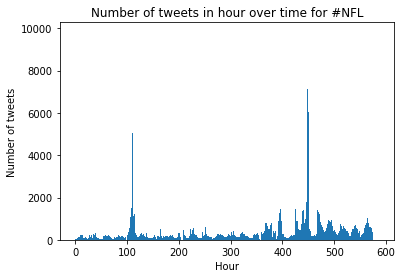

In [35]:
tweet_file = "tweets_#nfl.txt"
plot_number_of_tweets_in_hour("#NFL", tweet_file)

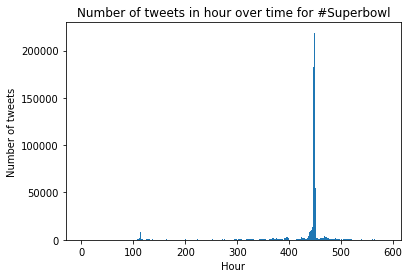

In [36]:
tweet_file = "tweets_#superbowl.txt"
plot_number_of_tweets_in_hour("#Superbowl", tweet_file)

# Question 10

## 10.1

## 10.2

## 10.3

## 10.4